In [30]:
import pickle
import numpy as np
import os

In [101]:
save_path = f"../results"

In [218]:
# Btot =[16, 32, 64, 128, 256, 512, 1024, 1536, 2048]
Btot =[128]
# Btot =[512, 1024, 1536]



In [249]:
name = "lstm_pca200"
nmse_lstm_mean = []
nmse_lstms = []
leg = []
for btot in Btot:
    nmse_lstm = np.load(os.path.join(save_path, f'nmse-{name}_Btot_{btot}.npy'))
    nmse_lstm_mean.append(np.mean(10 * np.log10(nmse_lstm)))
    nmse_lstms.append(nmse_lstm)
    leg.append(f"{name} - {btot} bits")
    
name2 = "lstm_pca80"
nmse_ref_mean = []
nmse_refs = []
for btot in Btot:
    nmse_ref = np.load(os.path.join(save_path, f'nmse-{name2}_Btot_{btot}.npy'))
    nmse_ref_mean.append(np.mean(10*np.log10(nmse_ref)))
    nmse_refs.append(nmse_ref)
    leg.append(f"{name2} - {btot} bits")

In [255]:
nmse_lstm

array([0.0983381 , 0.09036892, 0.08148354, ..., 0.19937354, 0.16999039,
       0.17206447])

ValueError: x and y must have same first dimension, but have shapes (1,) and (4,)

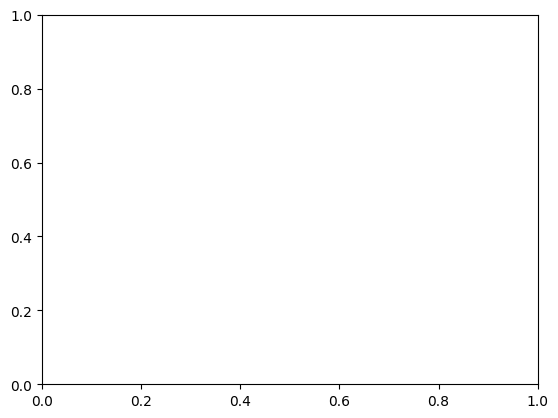

In [256]:
import matplotlib.pyplot as plt
plt.plot(Btot,nmse_lstm_mean)
plt.plot(Btot,nmse_ref_mean)
plt.legend([name, name2])

In [257]:
nmse_lstm = np.load(f'{save_path}\\nmse-{"lstmplot"}_Btot_{1024}.npy')
nmse_ref = np.load(f'{save_path}\\nmse-{"reference"}_Btot_{1024}.npy')


FileNotFoundError: [Errno 2] No such file or directory: '../results\\nmse-lstmplot_Btot_1024.npy'

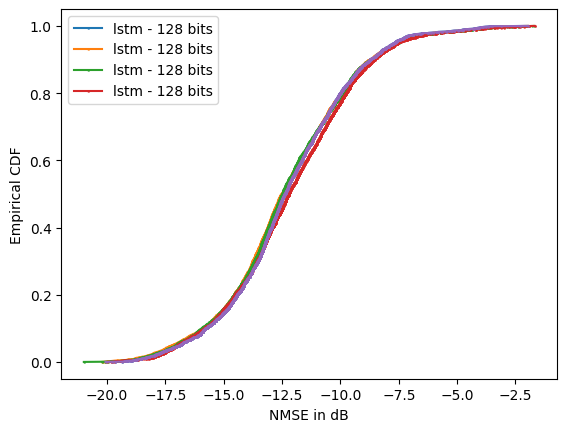

In [258]:
nmse_lstms.extend(nmse_refs)

markers = ["^","<",">","p","*"]
for i in range(len(nmse_lstms)):
    nmse = nmse_lstms[i]
    cdf_nmse = np.sort(10 * np.log10(nmse))
    # cdf_rho = np.sort(10 * np.log10(1 - rho))
    
    probabilities = np.arange(1, len(cdf_nmse) + 1) / len(cdf_nmse)
    
    if(i<5):
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)',marker=markers[1],markersize=1)
    else:
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')

        # plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')
        
    plt.xlabel('NMSE in dB')
    plt.ylabel('Empirical CDF')


plt.legend(leg)
plt.savefig(os.path.join(save_path, f'cdf_allbits.png'), dpi=300)

In [58]:
plt.plot(nmse_ref1)
plt.plot(nmse_ref2)

NameError: name 'nmse_ref1' is not defined

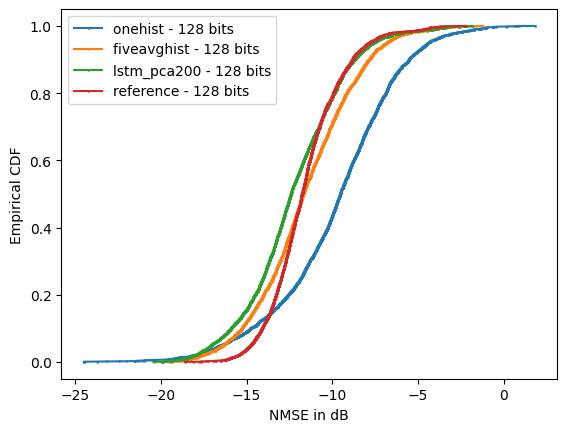

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt

save_path = "../results"
leg = []
nmse_lstms = []

def add_plot(name, btot):
    nmse_lstm = np.load(os.path.join(save_path, f'nmse-{name}_Btot_{btot}.npy'))
    nmse_lstms.append(nmse_lstm)
    leg.append(f"{name} - {btot} bits")

add_plot("onehist", 128)
add_plot("fiveavghist", 128)
add_plot("lstm_pca200", 128)
add_plot("reference", 128)

markers = ["^","<",">","p","*"]
for i in range(len(nmse_lstms)):
    nmse = nmse_lstms[i]
    cdf_nmse = np.sort(10 * np.log10(nmse))
    # cdf_rho = np.sort(10 * np.log10(1 - rho))

    probabilities = np.arange(1, len(cdf_nmse) + 1) / len(cdf_nmse)

    if(i<5):
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)',marker=markers[1],markersize=1)
    else:
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')

        # plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')

    plt.xlabel('NMSE in dB')
    plt.ylabel('Empirical CDF')

plt.legend(leg)



In [61]:

thing = """trainsnr0.1_testsnr0.1_windowsize25
trainsnr0.31622776601683794_testsnr0.31622776601683794_windowsize25
trainsnr1.0_testsnr1.0_windowsize25
trainsnr10.0_testsnr10.0_windowsize25
trainsnr100.0_testsnr100.0_windowsize25
trainsnr3.1622776601683795_testsnr3.1622776601683795_windowsize25
trainsnr31.622776601683793_testsnr31.622776601683793_windowsize25
trainsnr316.22776601683796_testsnr316.22776601683796_windowsize25
"""

thing = """trainsnr0.1_testsnr0.1_windowsize25
trainsnr0.31622776601683794_testsnr0.31622776601683794_windowsize25
trainsnr1.0_testsnr1.0_windowsize25
trainsnr3.1622776601683795_testsnr3.1622776601683795_windowsize25"""

thing = """trainsnr10.0_testsnr10.0_windowsize25
trainsnr31.622776601683793_testsnr31.622776601683793_windowsize25
trainsnr100.0_testsnr100.0_windowsize25
trainsnr316.22776601683796_testsnr316.22776601683796_windowsize25"""

folders = thing.split("\n")

In [62]:

folders[0][8: folders[0].find('_')]

'10.0'

hello 10.0
hello 31.622776601683793
hello 100.0
hello 316.22776601683796
hello 10.0
hello 31.622776601683793
hello 100.0
hello 316.22776601683796


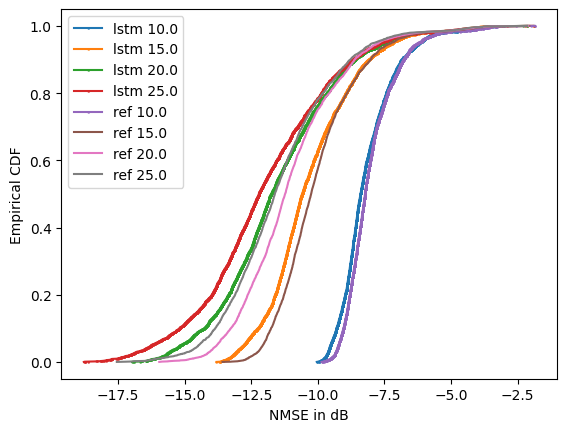

In [63]:

import matplotlib.pyplot as plt

save_path = "../results"

def noise_add_plot(folder, name, btot):
    nmse_lstm = np.load(os.path.join(save_path, folder, f'nmse-{name}_Btot_{btot}.npy'))
    nmse_lstms.append(nmse_lstm)
    # leg.append(f"{name} - {btot} bits")
    
leg = []
nmse_lstms = []
for f in folders:
    noise_add_plot(f, "lstm_pca200", 128)
    thing = f[8:f.find('_')]
    print(f"hello {thing}")
    leg.append(f"lstm {np.floor(10*np.log10(float(f[8:f.find('_')])))}")
    
    
for f in folders:
    noise_add_plot(f, "reference_pca200", 128)
    thing = f[8:f.find('_')]
    print(f"hello {thing}")
    leg.append(f"ref {np.floor(10*np.log10(float(f[8:f.find('_')])))}")
    
markers = ["^","<",">","p","*"]
for i in range(len(nmse_lstms)):
    nmse = nmse_lstms[i]
    cdf_nmse = np.sort(10 * np.log10(nmse))
    # cdf_rho = np.sort(10 * np.log10(1 - rho))

    probabilities = np.arange(1, len(cdf_nmse) + 1) / len(cdf_nmse)

    if(i<5):
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)',marker=markers[1],markersize=1)
    else:
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')

        # plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')

    plt.xlabel('NMSE in dB')
    plt.ylabel('Empirical CDF')

plt.legend(leg)


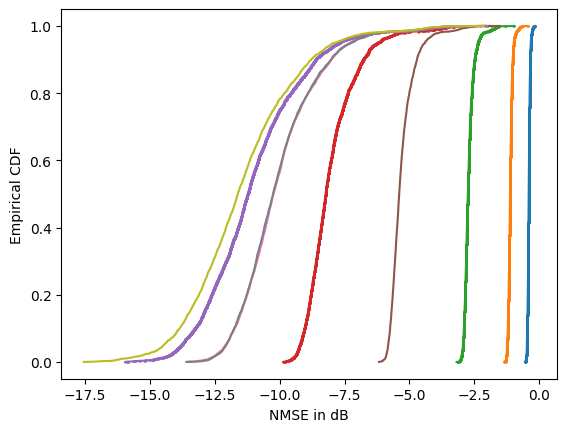

In [36]:
nmse_lstms = []
for f in folders:
    noise_add_plot(f, "reference_pca200", 128)
    


markers = ["^","<",">","p","*"]
for i in range(len(nmse_lstms)):
    nmse = nmse_lstms[i]
    cdf_nmse = np.sort(10 * np.log10(nmse))
    # cdf_rho = np.sort(10 * np.log10(1 - rho))

    probabilities = np.arange(1, len(cdf_nmse) + 1) / len(cdf_nmse)

    if(i<5):
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)',marker=markers[1],markersize=1)
    else:
        plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')

        # plt.plot(cdf_nmse, probabilities, label='CDF 10log(NMSE)')

    plt.xlabel('NMSE in dB')
    plt.ylabel('Empirical CDF')
